[[15.15915801]
 [ 0.42971688]]


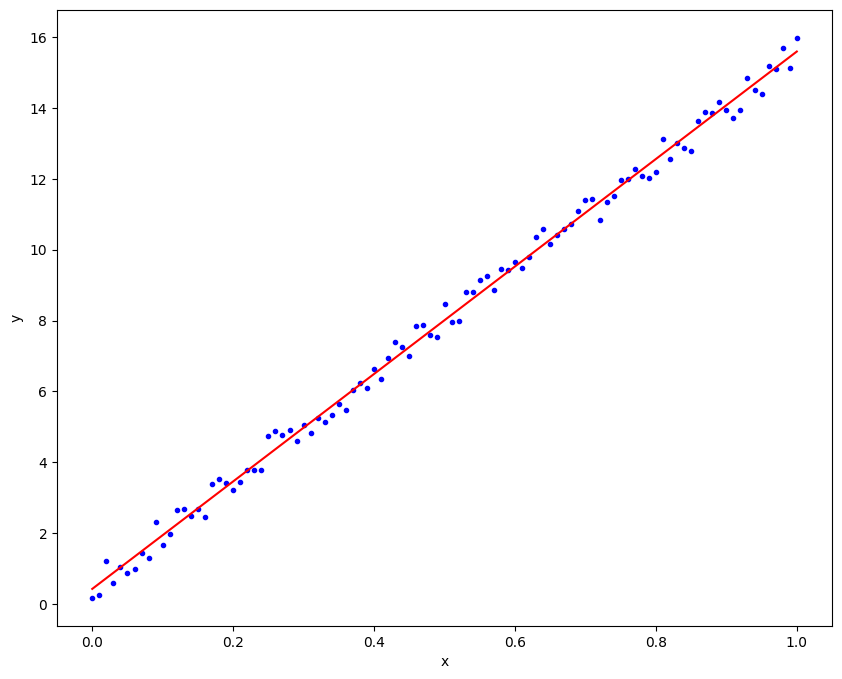

In [5]:
#Least Square Regression - Direct Inverse

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# plt.style.use("seaborn-poster")

#Direct Inverse
#generate x and y
x = np.linspace(0, 1, 101)
y = 15 * x + np.random.random(len(x))

#assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

#turn y into a column vector
y = y[:, np.newaxis]

alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)), y)
print(alpha)

#plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, "b.")
plt.plot(x, alpha[0] * x + alpha[1], "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

[[15.00478728]
 [ 0.553729  ]]


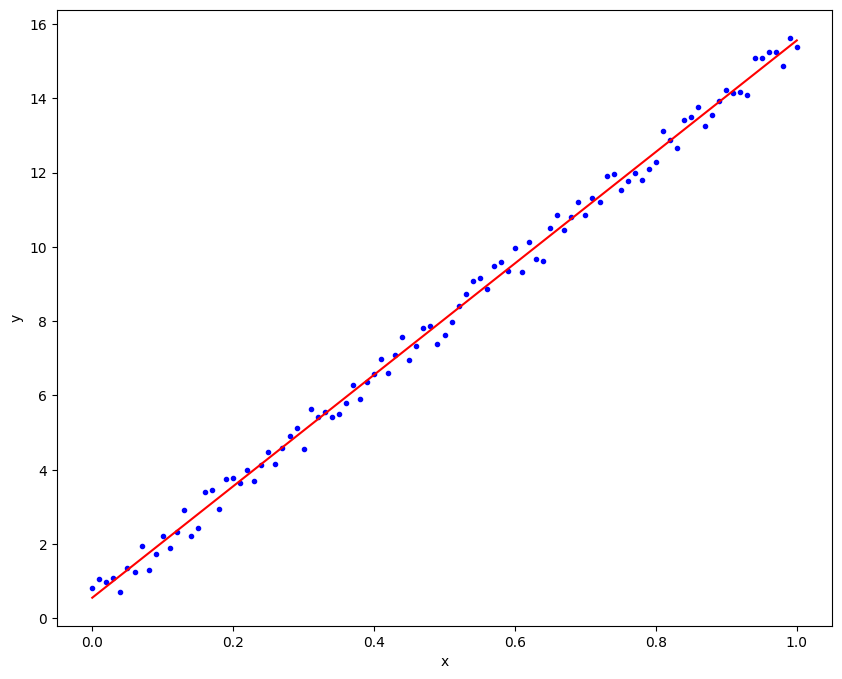

In [2]:
#Least Square Regression - Pseudo Inverse

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# plt.style.use("seaborn-poster")

#generate x and y
x = np.linspace(0, 1, 101)
y = 15 * x + np.random.random(len(x))

#assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

#turn y into a column vector
y = y[:, np.newaxis]

#Pseudo Inverse
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

#plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, "b.")
plt.plot(x, alpha[0] * x + alpha[1], "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

[[15.13636855]
 [ 0.42534996]]


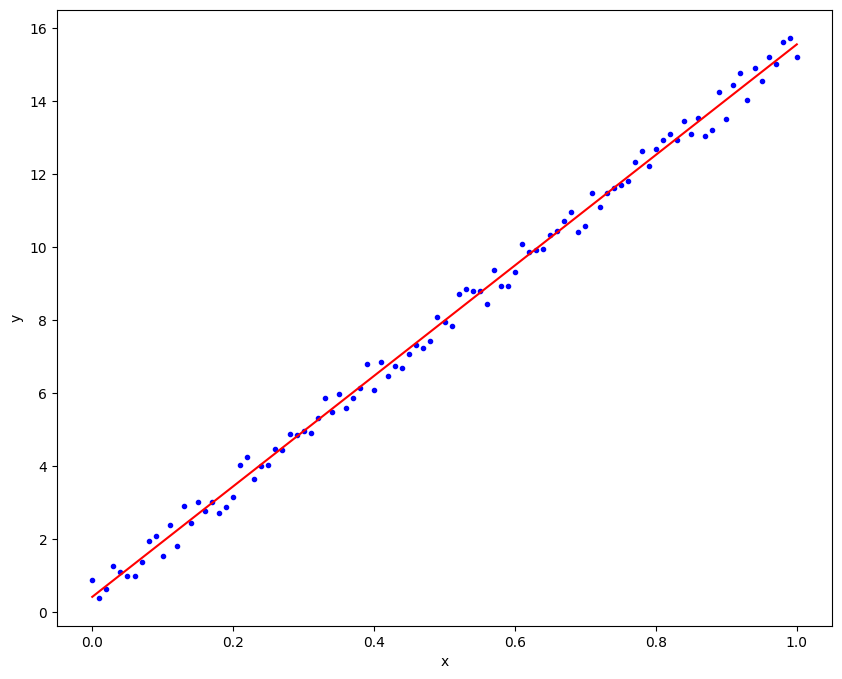

In [1]:
#Least Square Regression - Numpy.linalg.lstsq

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# plt.style.use("seaborn-poster")

#generate x and y
x = np.linspace(0, 1, 101)
y = 15 * x + np.random.random(len(x))

#assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

#turn y into a column vector
y = y[:, np.newaxis]

#numpy.linalg.lstsq
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

#plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, "b.")
plt.plot(x, alpha[0] * x + alpha[1], "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [17]:
#Least Square Regression - Optimize Curve Fit from Scipy

import numpy as np
from scipy import optimize

#Direct Inverse
#generate x and y
x = np.linspace(0, 1, 101)
y = 1 + x + x * np.random.random(len(x))

def func(x, a, b):
  y = a * x + b
  return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(alpha)

[1.47161927 1.01156543]


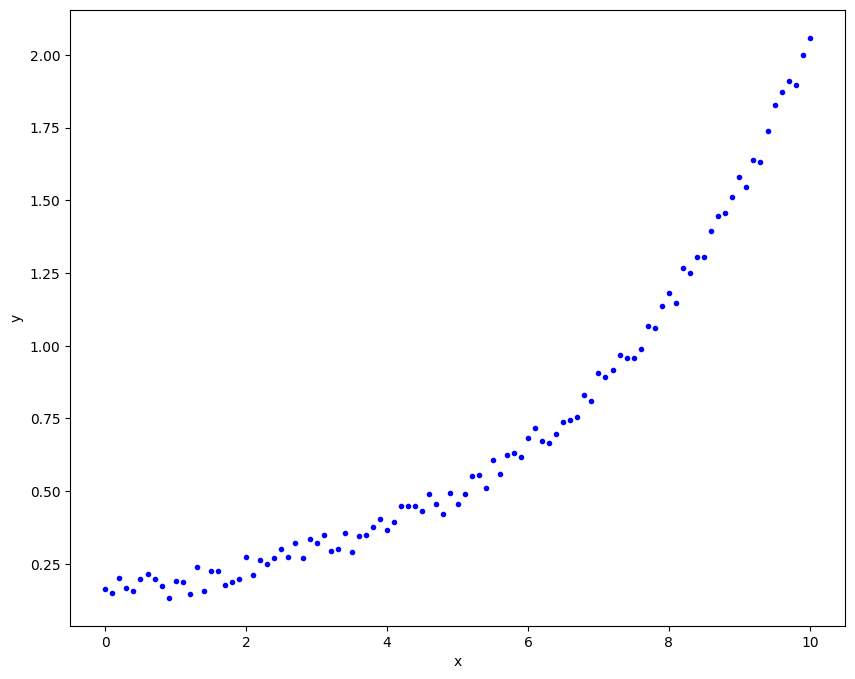

In [8]:
#Log Tricks for Exponential Functions without log trick

import numpy as np
from scipy import optimize
# import matplotlib.pyplot as plt

# plt.style.use("seaborn-poster")

#Generate x and y, and add some noise into y
x = np.linspace(0, 10, 101)
y = 0.1 * np.exp(0.3 * x) + 0.1 * np.random.random(len(x))

#Show data
plt.figure(figsize = (10, 8))
plt.plot(x, y, "b.")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

alpha = 0.13895698166780932, beta = 0.2637395739847401


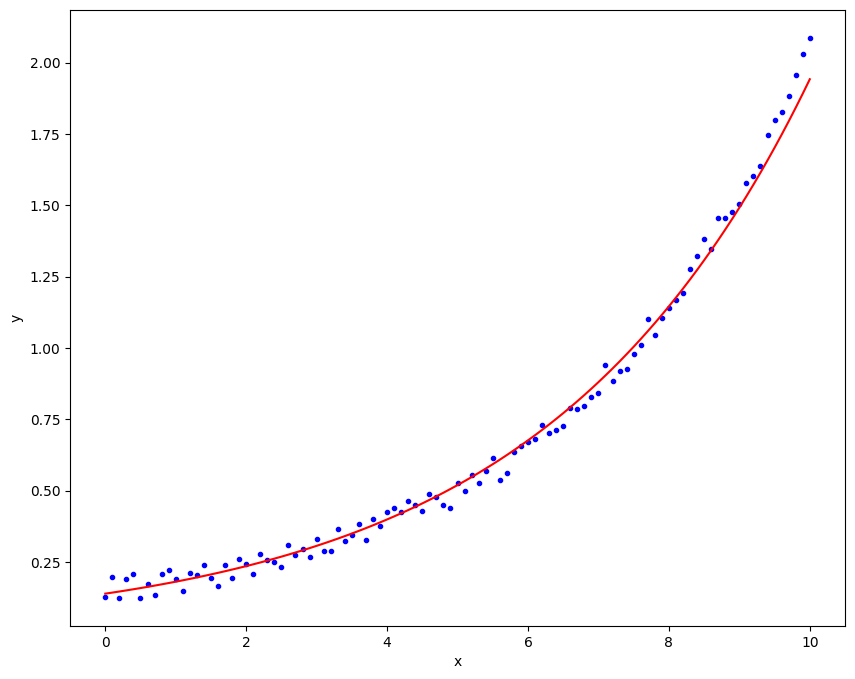

In [9]:
#Log Tricks for Exponential Functions with log trick

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# plt.style.use("seaborn-poster")

#Generate x and y, and add some noise into y
x = np.linspace(0, 10, 101)
y = 0.1 * np.exp(0.3 * x) + 0.1 * np.random.random(len(x))

A = np.vstack([x, np.ones(len(x))]).T
beta, log_alpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(log_alpha)
print(f"alpha = {alpha}, beta = {beta}")

plt.figure(figsize = (10, 8))
plt.plot(x, y, "b.")
plt.plot(x, alpha * np.exp(beta * x), "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

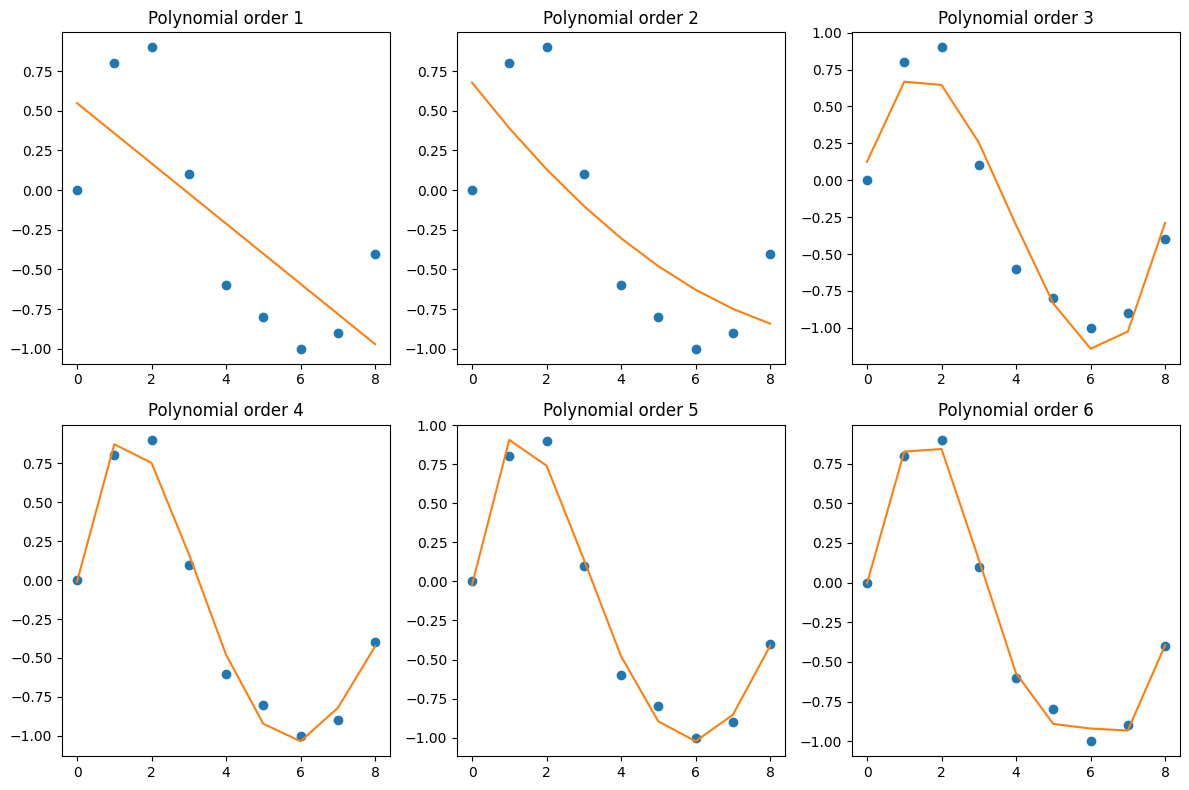

In [10]:
#Polynomial Regression

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize = (12, 8))
for i in range(1, 7):
  #get the polynomial coefficients
  y_est = np.polyfit(x_d, y_d, i)
  plt.subplot(2,3,i)
  plt.plot(x_d, y_d, "o")
  #evaluate the values for a polynomial
  plt.plot(x_d, np.polyval(y_est, x_d))
  plt.title(f"Polynomial order {i}")

plt.tight_layout()
plt.show()

alpha = 0.12127695745087305, beta = 0.2828632334982593


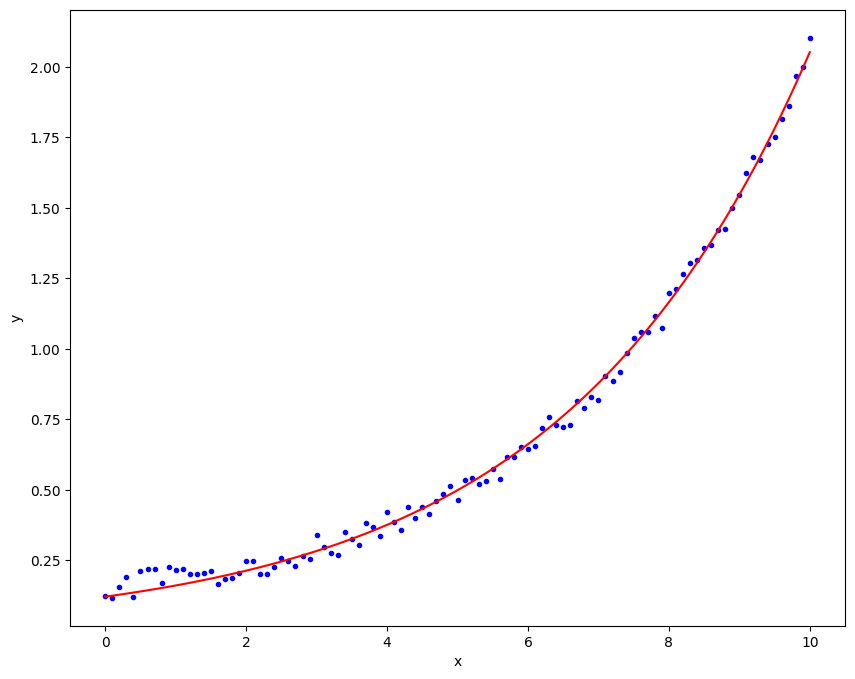

In [11]:
#Polynomial Regression Optimize Curve Fit from Scipy

import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#Generate x and y, and add some noise into y
x = np.linspace(0, 10, 101)
y = 0.1 * np.exp(0.3 * x) + 0.1 * np.random.random(len(x))

def func(x, a, b):
  y = a * np.exp(b * x)
  return y

alpha, beta = optimize.curve_fit(func, xdata = x, ydata = y)[0]
print(f"alpha = {alpha}, beta = {beta}")

plt.figure(figsize = (10, 8))
plt.plot(x, y, "b.")
plt.plot(x, alpha * np.exp(beta * x), "r")
plt.xlabel("x")
plt.ylabel("y")
plt.show()